<a href="https://colab.research.google.com/github/sriharshams/cs498aml/blob/master/homework%201/2a/colab/homework_1_2a_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: Question 2


## Problem 2: MNIST Image Classification

Points: 60

The MNIST dataset is a dataset of 60,000 training and 10,000 test examples of handwritten digits, originally constructed by Yann Lecun, Corinna Cortes, and Christopher J.C. Burges. It is very widely used to check simple methods. There are 10 classes in total ("0" to "9"). This dataset has been extensively studied, and there is a history of methods and feature constructions at https://en.wikipedia.org/wiki/MNIST_database and at the original site, http://yann.lecun.com/exdb/mnist/. You should notice that the best methods perform extremely well.

(Updated 1/19) The http://yann.lecun.com/exdb/mnist/ dataset is stored in an unusual format, described in detail on the page.  You do not have to write your own reader.  A web search should yield solutions for both Python and R.  For Python, https://pypi.org/project/python-mnist/ should work.  For R, there is reader code available at https://stackoverflow.com/questions/21521571/how-to-read-mnist-database-in-r. Please note that if you follow the recommendations in the accepted answer there at https://stackoverflow.com/a/21524980, you must also provide the readBin call with the flag signed=FALSE since the data values are stored as unsigned integers.

The dataset consists of 28 x 28 images. These were originally binary images, but appear to be grey level images as a result of some anti-aliasing. I will ignore mid-grey pixels (there aren't many of them) and call dark pixels "ink pixels", and light pixels "paper pixels"; you can modify the data values with a threshold to specify the distinction, as described here https://en.wikipedia.org/wiki/Thresholding_(image_processing). The digit has been centered in the image by centering the center of gravity of the image pixels, but as mentioned on the original site, this is probably not ideal. Here are some options for re-centering the digits that I will refer to in the exercises.

Untouched: Do not re-center the digits, but use the images as is.
Bounding box: Construct a 20 x 20 bounding box so that the horizontal (resp. vertical) range of ink pixels is centered in the box.
Stretched bounding box: Construct a 20 x 20 bounding box so that the horizontal (resp. vertical) range of ink pixels runs the full horizontal (resp. vertical) range of the box. Obtaining this representation will involve rescaling image pixels: you find the horizontal and vertical ink range, cut that out of the original image, then resize the result to 20 x 20. Once the image has been re-centered, you can compute features.
Here are some pictures, which may help
bounding box

![mnist_image](https://courses.engr.illinois.edu/cs498aml/sp2019/homeworks/bounding_v2.png)

### Part 2A: MNIST using naive Bayes
Model each class of the dataset using a Normal distribution and (separately) a Bernoulli distribution for both untouched images v. stretched bounding boxes, using 20 x 20 for your bounding box dimension.  This should result in 4 total models.  Use the training set to calculate the distribution parameters.

You must write the naive Bayes prediction code.  The distribution parameters can be calculated manually or via libraries.  Additionally, we recommend using a library to load the MNIST data (e.g. python-mnist or scikit-learn) and to rescale the images (e.g. openCV).

Compute the accuracy values for the four combinations of Normal v. Bernoulli distributions for both untouched images v. stretched bounding boxes.  Both the training and test set accuracy will be reported.
For each digit, plot the mean pixel values calculated for the Normal distribution of the untouched images.  In Python, a library such as matplotlib should prove useful.



### Answer Part 2A:

To build a somple naive Bayes classifier to classify  MNIST data dataset. We will be using Python 3 in Google Colab.



#### Set up

Load required libraries


In [0]:
!pip install --upgrade --force-reinstall python-mnist

  Running setup.py bdist_wheel for python-mnist ... - done
  Stored in directory: /root/.cache/pip/wheels/28/29/36/408f83545a511c43d03ef997a1dc99b49ccd5f9f306ed92468
Successfully built python-mnist


In [0]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import bernoulli
from mnist import MNIST
import matplotlib.pyplot as plt
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
import warnings
warnings.filterwarnings("ignore")

#### Load dataset

Access http://yann.lecun.com/exdb/mnist/, download the dataset.

There are 4 files:

train-images-idx3-ubyte: training set images 

train-labels-idx1-ubyte: training set labels 

t10k-images-idx3-ubyte:  test set images 

t10k-labels-idx1-ubyte:  test set labels

The training set contains 60000 examples, and the test set 10000 examples.









##### Dataset dictionary

TRAINING SET LABEL FILE (train-labels-idx1-ubyte):

[offset] [type]          [value]          [description] 

0000     32 bit integer  0x00000801(2049) magic number (MSB first) 

0004     32 bit integer  60000            number of items 

0008     unsigned byte   ??               label 

0009     unsigned byte   ??               label 

........ 

xxxx     unsigned byte   ??               label

The labels values are 0 to 9.


TRAINING SET IMAGE FILE (train-images-idx3-ubyte):

[offset] [type]          [value]          [description] 

0000     32 bit integer  0x00000803(2051) magic number 

0004     32 bit integer  60000            number of images 

0008     32 bit integer  28               number of rows 

0012     32 bit integer  28               number of columns 

0016     unsigned byte   ??               pixel 

0017     unsigned byte   ??               pixel 

........ 

xxxx     unsigned byte   ??               pixel

Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).


TEST SET LABEL FILE (t10k-labels-idx1-ubyte):

[offset] [type]          [value]          [description] 

0000     32 bit integer  0x00000801(2049) magic number (MSB first) 

0004     32 bit integer  10000            number of items 

0008     unsigned byte   ??               label 

0009     unsigned byte   ??               label 

........ 

xxxx     unsigned byte   ??               label

The labels values are 0 to 9.


TEST SET IMAGE FILE (t10k-images-idx3-ubyte):

[offset] [type]          [value]          [description] 

0000     32 bit integer  0x00000803(2051) magic number 

0004     32 bit integer  10000            number of images 

0008     32 bit integer  28               number of rows 

0012     32 bit integer  28               number of columns 

0016     unsigned byte   ??               pixel 

0017     unsigned byte   ??               pixel 

........ 

xxxx     unsigned byte   ??               pixel

Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black). 



To access the dataset in Google Colab you can either use Github or Google Drive. We will be accessing dataset via Google Drive. Unzip the pimaindiansdiabetescsv.zip, add pima-indians-diabetes.csv to a known folder in Google Drive, this folder path in drive will be accessed later to load dataset.


We added the pima-indians-diabetes.csv to Google Drive folder /My Drive/UISC-MCS-DS/CS498AML/homework_1/2a/data/.

*   Mount Google Drive to access data Note: This is not required if you are not using Google colab



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Reading the dataset 

Following instructions here https://pypi.org/project/python-mnist/, we were able to load dataset using MNIST library

In [0]:
mndata = MNIST('/content/gdrive/My Drive/UIUC-MCS-DS/CS498AML/homework_1/data')
features_train, labels_train = mndata.load_training()
features_test, labels_test = mndata.load_testing()


#### Data processing



Bounding box: Construct a 20 x 20 bounding box so that the horizontal (resp. vertical) range of ink pixels is centered in the box.

Stretched bounding box: Construct a 20 x 20 bounding box so that the horizontal (resp. vertical) range of ink pixels runs the full horizontal (resp. vertical) range of the box. Obtaining this representation will involve rescaling image pixels: you find the horizontal and vertical ink range, cut that out of the original image, then resize the result to 20 x 20. Once the image has been re-centered, you can compute features.

In [0]:
class data_preprocessor():
    def __init__(self, image_size=28, thresholding=50, stretched_bb_flag=False, resize=20):
        self.image_size = image_size
        self.thresholding = thresholding
        self.stretched_bb_flag = stretched_bb_flag
        self.resize = resize
        
    
        
    
    def preprocess(self,features):
        self.count_features=features.shape[0]        
        
        if self.stretched_bb_flag: 
            features_reshape = features.reshape(self.count_features,self.image_size,self.image_size).astype(float)
            
            features_reshape_stretched_boundingbox = np.zeros((self.count_features,self.resize,self.resize))
            
            for i in range(self.count_features):
                features_reshape_stretched_boundingbox[i]=self.stretched_boundingbox_single(features_reshape[i])
            features_reshape_stretched_boundingbox=features_reshape_stretched_boundingbox.reshape(self.count_features,self.resize*self.resize)
            
            # Image processing, thresholding
            features_thresholding = (features_reshape_stretched_boundingbox >self.thresholding).astype(float)*255
            
            return features_thresholding
        
        # Image processing, thresholding, threshold at 50
        features_thresholding = (features >self.thresholding).astype(float)*255
        
        return features_thresholding
        
    def stretched_boundingbox_single(self, img):
        lower_bound =  np.where(np.any(img,axis=1))[0][0]
        upper_bound =  np.where(np.any(img,axis=1))[0][-1]
        left_bound =  np.where(np.any(img,axis=0))[0][0]
        right_bound =  np.where(np.any(img,axis=0))[0][-1]
        stretched_boundingbox = cv2.resize(img[lower_bound:upper_bound,left_bound:right_bound], (self.resize, self.resize)) 
        return stretched_boundingbox 

In [0]:
# Preprocessing option1: Original data (without stretched bounding box) with thresholding
img_processor = data_preprocessor(stretched_bb_flag=False)
features_train = img_processor.preprocess(np.array(features_train))
features_test = img_processor.preprocess(np.array(features_test))

# Preprocessing option2: Stretched Bounding Box with thresholding
img_processor2 = data_preprocessor(stretched_bb_flag=True)
features_train_stretched_boundingbox  = img_processor2.preprocess(np.array(features_train))
features_test_test_stretched_boundingbox  = img_processor2.preprocess(np.array(features_test))

# Convert labels to array
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)

print("training ", features_train.shape)
print("training ", len(labels_train))

training  (60000, 784)
training  60000


There are 60000  images for training.



#### Classify Dataset - Build a simple naive Bayes classifier 

#### Gaussian Naive Bayes classifier 
Reusing Gaussian Naive Bayes from Homework 1a

In [0]:
class GaussianNaiveBayes():
    """The Gaussian Naive Bayes classifier. """
    def fit(self,features, labels):
      """
      for each label and feature combination we need to calculate the std and mean value from the features & labels.
      """
      self.min_std = 0.001
      self.ntargets= np.unique(labels).shape[0]
      self.target_labels = np.unique(labels)
      self.nfeatures = features.shape[1]
      self.means = np.zeros((self.ntargets,self.nfeatures))
      self.stds = np.zeros((self.ntargets,self.nfeatures))
      self.priors = np.zeros(self.ntargets)
      for _index in range(self.ntargets):
          # Get the boolean vector to filter for labels = i
          where_label = [label==self.target_labels[_index] for label in labels]
          self.means[_index] = np.nanmean(features[where_label],axis=0)
          # To avoid devide by 0/very small value issue, add a min for standard deviation to min_std = 0.00000001
          self.stds[_index] = np.clip(np.nanstd(features[where_label],axis=0),self.min_std,None)
          #print(self.means[_index], self.stds[_index])
          #Calculate the prior for given label 
          self.priors[_index] = np.log(np.sum(where_label)/len(labels))
    
    def predict(self,test_features):
        """ Classification using Bayes Rule P(Y|X) = P(X|Y)*P(Y)/P(X),
          or Posterior = Likelihood * Prior / Scaling Factor
          P(Y|X) - The posterior is the probability that sample x is of class y given the
                   feature values of x being distributed according to distribution of y and the prior.
          P(X|Y) - Likelihood of data X given class distribution Y.
                   Gaussian distribution (given by norm.pdf)
          P(Y)   - Prior (given by _calculate_prior)
          P(X)   - Scales the posterior to make it a proper probability distribution.
                   This term is ignored in this implementation since it doesn't affect
                   which class distribution the sample is most likely to belong to.
         Classifies the sample as the class that results in the largest P(Y|X) (posterior)
         """
        test_samples = test_features.shape[0]
        posterior = np.zeros((test_samples,self.ntargets))
        # Naive assumption (independence):
        # P(x1,x2,x3|Y) = P(x1|Y)*P(x2|Y)*P(x3|Y)
        # Posterior is product of prior and likelihoods (ignoring scaling factor)
        for target_label in range(self.ntargets):
            posterior[:,target_label] = self.priors[target_label] + np.nansum(np.log(norm.pdf(test_features,self.means[target_label],self.stds[target_label])),axis=1)
        label = self.target_labels[np.argmax(posterior, axis=1)]
        return label    
        
    
    def score(self, features_test, labels_test):
        labels_predict = self.predict(features_test)
        return (labels_predict == labels_test).mean()

#### Bernoulli Naive Bayes classifier 
Bernoulli Naive Bayes classifier code

In [0]:
class BernoulliNaiveBayes():
    """The Bernoulli Naive Bayes classifier. """
        
    def fit(self,features, labels):
        """
        for each label and feature combination we need to calculate the std and mean value from the features & labels.
        """
        self.num_of_class = np.unique(labels).shape[0]
        self.target_labels = np.unique(labels)
        self.num_of_feature = features.shape[1]
        self.pblacks = np.zeros((self.num_of_class,self.num_of_feature))
        self.priors = np.zeros(self.num_of_class)
        for i in range(self.num_of_class):
            # Get the boolean vector to filter for y = i
            where_label = [l==self.target_labels[i] for l in labels]
            self.pblacks[i] = np.mean(features[where_label], axis=0)/255
            # calculate priors
            self.priors[i] = np.log(np.sum(where_label)/len(labels))
    
    def predict(self,test_features):
        """ Classification using Bayes Rule P(Y|X) = P(X|Y)*P(Y)/P(X),
          or Posterior = Likelihood * Prior / Scaling Factor
          P(Y|X) - The posterior is the probability that sample x is of class y given the
                   feature values of x being distributed according to distribution of y and the prior.
          P(X|Y) - Likelihood of data X given class distribution Y.
                   Bernoulli distribution (given by bernoulli.pmf)
          P(Y)   - Prior (given by _calculate_prior)
          P(X)   - Scales the posterior to make it a proper probability distribution.
                   This term is ignored in this implementation since it doesn't affect
                   which class distribution the sample is most likely to belong to.
         Classifies the sample as the class that results in the largest P(Y|X) (posterior)
        """
        samples = test_features.shape[0]
        posterior = np.zeros((samples,self.num_of_class))
        for i in range(self.num_of_class):
            posterior[:,i] = self.priors[i] + np.sum(np.log(bernoulli.pmf(test_features/255,self.pblacks[i])),axis=1)
        label = self.target_labels[np.argmax(posterior, axis=1)]
        return label       
    
    def score(self, features_test, labels_test):
        labels_predict = self.predict(features_test)
        return (labels_predict == labels_test).mean()  

#### Calculate Accuracy

In [0]:
# Use RandomForestClassifier to classify MNIST
from sklearn.ensemble import RandomForestClassifier

def calculate_accuracy(stretched_bb_flag, model_name, use_sklearn=False, forest_params=(10,4)):
    if stretched_bb_flag:
        m_features_train = features_train_stretched_boundingbox
        m_features_test = features_test_test_stretched_boundingbox
    else:
        m_features_train = features_train
        m_features_test = features_test
    
    if use_sklearn == False:
        if (model_name =='Normal'):
            classifier = GaussianNaiveBayes()
        elif (model_name =='Bernoulli'):
            classifier = BernoulliNaiveBayes() 
    else:
        if (model_name =='Normal'):
            classifier = naive_bayes.GaussianNB()
        elif (model_name =='Bernoulli'):
            classifier = naive_bayes.BernoulliNB() 
        # Part 2B: MNIST using Decision Forest
        elif (model_name =='decision_forest'):
            classifier = RandomForestClassifier(n_estimators=forest_params[0], max_depth= forest_params[1], random_state=4)
            
    classifier.fit(m_features_train, labels_train)
     
    
    return classifier.score(m_features_train, labels_train), classifier.score(m_features_test, labels_test)

Compute the accuracy values for the four combinations of Normal v. Bernoulli distributions for both untouched images v. stretched bounding boxes.  Both the training and test set accuracy will be reported.

Classify MNIST using a decision forest.
For your forest construction, you should investigate four cases. Your cases are: number of trees = (10, 30) X maximum depth = (4, 16). You should compute your accuracy for each of the following cases: untouched raw pixels; stretched bounding box. This yields a total of 8 slightly different classifiers. Please use 20 x 20 for your bounding box dimensions.

In [0]:
print("Gaussian + untouched: train & test accuracy- ", calculate_accuracy(False, 'Normal'))

print("Gaussian + stretched: train & test accuracy- ", calculate_accuracy(True,  'Normal'))

print("Bernoulli + untouched: train & test accuracy- ", calculate_accuracy(False, 'Bernoulli'))

print("Bernoulli + stretched: train & test accuracy- ", calculate_accuracy(True, 'Bernoulli'))




Gaussian + untouched: train & test accuracy-  (0.52975, 0.5207)
Gaussian + stretched: train & test accuracy-  (0.8130333333333334, 0.8234)
Bernoulli + untouched: train & test accuracy-  (0.83645, 0.8445)
Bernoulli + stretched: train & test accuracy-  (0.795, 0.8106)


x | Method | Training Set Accuracy|  Test Set Accuracy
--- | --- | ---
1 | Gaussian + untouched | 0.46995|0.4631
2 | Gaussian + stretched | 0.8130333333333334|0.8234
3 | Bernoulli + untouched | 0.83645| 0.8445
4 | Bernoulli + stretched | 0.795 | 0.8106 	 



Validate using scikit learn library

In [0]:
print("Gaussian + untouched: train & test accuracy- ", calculate_accuracy(False, 'Normal', True))

print("Gaussian + stretched: train & test accuracy- ", calculate_accuracy(True, 'Normal', use_sklearn=True))

print("Bernoulli + untouche: train & test accuracy- ", calculate_accuracy(False, 'Bernoulli', use_sklearn=True))

print("Bernoulli + stretched: train & test accuracy- ", calculate_accuracy(True, 'Bernoulli', use_sklearn=True))



Gaussian + untouched: train & test accuracy-  (0.5455833333333333, 0.5398)
Gaussian + stretched: train & test accuracy-  (0.8130333333333334, 0.8234)
Bernoulli + untouche: train & test accuracy-  (0.8343666666666667, 0.8445)
Bernoulli + stretched: train & test accuracy-  (0.7950166666666667, 0.8107)


###  Part 2A Digit Images 



For each digit, plot the mean pixel values calculated for the Normal distribution of the untouched images.  In Python, a library such as matplotlib should prove useful.

Normal distribution of untouched images


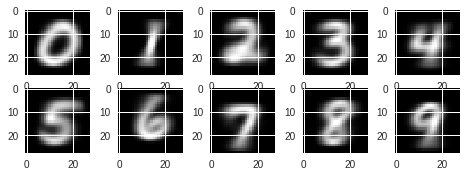

In [0]:
from pylab import imshow, show, cm
# Visualization Guassian Naive Bayes trained (on original data with thresholding) classifier with mnist datase
nb = GaussianNaiveBayes()
nb.fit(features_train,labels_train)

def view_image(image, label=""):
    """View a single image."""
    #print("Label: %s" % label)
    imshow(image, cmap=cm.gray)
    show()

print("Normal distribution of untouched images")
for i in range(10):
    plt.subplot(4, 5, i+1)
    #view_image(nb.means[i].reshape(28,28), i)
    imshow(nb.means[i].reshape(28,28),cmap='gray')



Normal distribution of stretched images


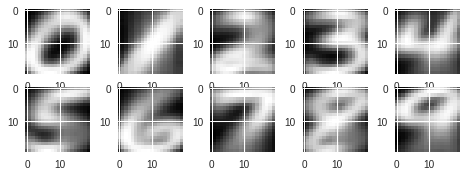

In [0]:
nb_stretched = GaussianNaiveBayes()
nb_stretched.fit(features_train_stretched_boundingbox, labels_train)

print("Normal distribution of stretched images")    
for i in range(10):
    plt.subplot(4, 5, i+1)
    imshow(nb_stretched.means[i].reshape(20,20),cmap='gray')

Bernoulli distribution of untouched images


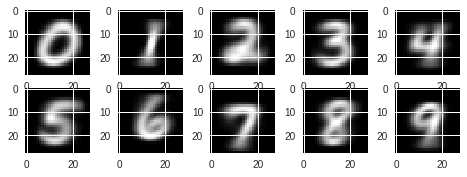

In [0]:
bernoulli_nb = BernoulliNaiveBayes()
bernoulli_nb.fit(features_train,labels_train)

print("Bernoulli distribution of untouched images")
for i in range(10):
    plt.subplot(4, 5, i+11)
    #view_image(np.array(bernoulli_nb.pblacks[i]).reshape(28,28), i)
    imshow(np.array(bernoulli_nb.pblacks[i]).reshape(28,28),cmap='gray')

BernoulliNaiveBayes distribution of stretched images


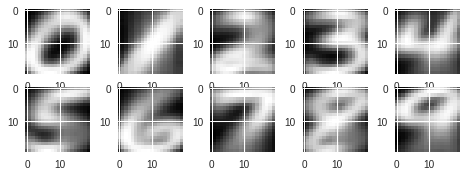

In [0]:
bernoulli_nb_stretched = BernoulliNaiveBayes()
bernoulli_nb_stretched.fit(features_train_stretched_boundingbox, labels_train)

print("BernoulliNaiveBayes distribution of stretched images")    
for i in range(10):
    plt.subplot(4, 5, i+1)
    imshow(nb_stretched.means[i].reshape(20,20),cmap='gray')

## Part 2B: MNIST using Decision Forest

Classify MNIST using a decision forest.
For your forest construction, you should investigate four cases. Your cases are: number of trees = (10, 30) X maximum depth = (4, 16). You should compute your accuracy for each of the following cases: untouched raw pixels; stretched bounding box. This yields a total of 8 slightly different classifiers. Please use 20 x 20 for your bounding box dimensions.



In [0]:
print("10 trees + 4 depth + untouched: train & test accuracy- ", calculate_accuracy(False, 'decision_forest', True, (10,4)))

print("10 trees + 4 depth + stretched: train & test accuracy- ", calculate_accuracy(True, 'decision_forest', True, (10,4)))

print("10 trees + 16 depth + untouched: train & test accuracy- ", calculate_accuracy(False, 'decision_forest', True, (10,16)))

print("10 trees + 16 depth + stretched: train & test accuracy- ", calculate_accuracy(True, 'decision_forest', True, (10,16)))

print("30 trees + 4 depth + untouched: train & test accuracy- ", calculate_accuracy(False, 'decision_forest', True, (30,4)))

print("30 trees + 4 depth + stretched: train & test accuracy- ", calculate_accuracy(True, 'decision_forest', True, (30,4)))

print("30 trees + 16 depth + untouched: train & test accuracy- ", calculate_accuracy(False, 'decision_forest', True, (30,16)))

print("30 trees + 16 depth + stretched: train & test accuracy- ", calculate_accuracy(True, 'decision_forest', True, (30,16)))

10 trees + 4 depth + untouched: train & test accuracy-  (0.71845, 0.726)
10 trees + 4 depth + stretched: train & test accuracy-  (0.7444666666666667, 0.7663)
10 trees + 16 depth + untouched: train & test accuracy-  (0.99265, 0.9486)
10 trees + 16 depth + stretched: train & test accuracy-  (0.9958333333333333, 0.9549)
30 trees + 4 depth + untouched: train & test accuracy-  (0.76895, 0.7792)
30 trees + 4 depth + stretched: train & test accuracy-  (0.7681666666666667, 0.7867)
30 trees + 16 depth + untouched: train & test accuracy-  (0.9961833333333333, 0.9636)
30 trees + 16 depth + stretched: train & test accuracy-  (0.9974, 0.9646)


x | Method | Training Set Accuracy|  Test Set Accuracy
--- | --- | ---
1 | Gaussian + untouched | 0.46995|0.4631
2 | Gaussian + stretched | 0.8130333333333334|0.8234
3 | Bernoulli + untouched | 0.83645| 0.8445
4 | Bernoulli + stretched | 0.795 | 0.8106 	 
5 | 10 trees + 4 depth +  untouched | 0.71845|0.726
6 | 10 trees + 4 depth +  stretched | 0.7444666666666667|0.7663
7 | 10 trees + 16 depth +  untouched | 0.99265| 0.9486
8 | 10 trees + 16 depth +  stretched | 0.9958333333333333 | 0.9549 
9 | 30 trees + 4 depth +  untouched | 0.76895|0.7792
10 | 30 trees + 4 depth +  stretched | 0.7681666666666667|0.7867
11 | 30 trees + 16 depth +  untouched | 0.9961833333333333| 0.9636
12| 30 trees + 16 depth +  stretched | 0.9974 | 0.9646

#### References
Following are various resources referred while writing this solution

*   My Github projects https://github.com/sriharshams/mlnd/
*   Code of codyznash https://github.com/codyznash/GANs_for_Credit_Card_Data
*   Tutorials of https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
*   Naive Bayes in Scikit-Learn: Implementation of naive bayes in the scikit-learn library.
*   Naive Bayes documentation: Scikit-Learn documentation and sample code for Naive Bayes
*  [Classify MNIST with PyBrain](https://martin-thoma.com/classify-mnist-with-pybrain/)
*  [Scikit RandomForestClassifier] (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
*   [Applied Machine Learning, D.A. Forsyth, (approximate 18'th draft)](http://luthuli.cs.uiuc.edu/~daf/courses/AML-18-Fall/AMLbook-3-Dec-18.pdf)
*   Piazza & Slack discussions on CS-498 Spring 2019


